In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
data1 = pd.read_csv("/home/joshard/jupyter_env/files/code/Maths.csv")
data2 = pd.read_csv("/home/joshard/jupyter_env/files/code/Portuguese.csv")

In [7]:
data1.shape

(395, 33)

In [8]:
data2.shape

(649, 33)

In [9]:
results = [data1, data2]
data = pd.concat(results)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [11]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
# data.isna().sum().to_frame()

In [15]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

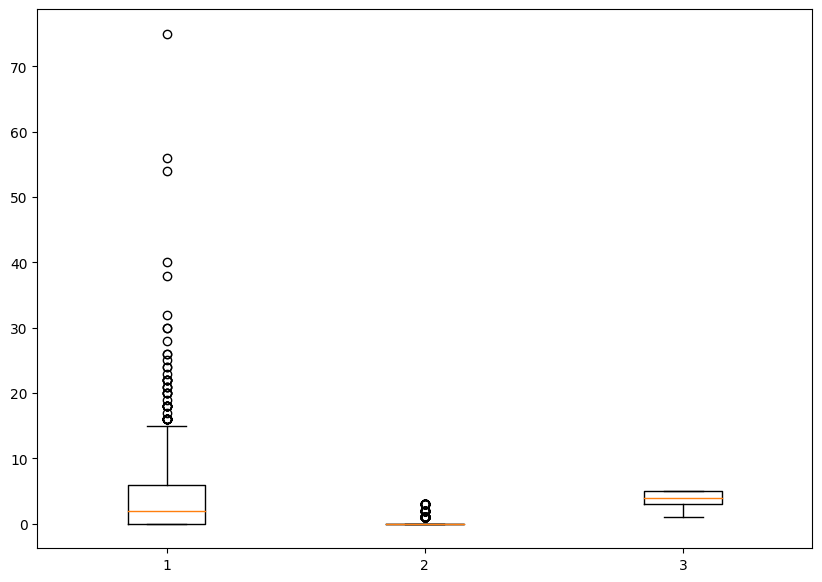

In [18]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot outliers
plt.boxplot(data[['absences','failures','health']])
 
# show plot
plt.show()

In [19]:
category_data = data.select_dtypes(exclude='number')

In [20]:
category_data

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [21]:
# unique(values)
category_data['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [22]:
category_data['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [23]:
category_data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [24]:
category_data.Mjob.replace(to_replace=['health', 'teacher', 'services', 'at_home', 'other'],
                      value=[1,2,3,4,5], inplace=True)
category_data.Fjob.replace(to_replace=['health', 'teacher', 'services', 'at_home', 'other'],
                      value=[1,2,3,4,5], inplace=True)
category_data.guardian.replace(to_replace=['mother', 'father', 'other'],
                      value=[1,2,3], inplace=True)
category_data.sex.replace(to_replace=['M', 'F'],
                      value=[1,0], inplace=True)
category_data.address.replace(to_replace=['U', 'R'],
                      value=[1,0], inplace=True)
category_data.famsize.replace(to_replace=['LE3', 'GT3'],
                      value=[0,1], inplace=True)
category_data.Pstatus.replace(to_replace=['T', 'A'],
                      value=[1,0], inplace=True)
category_data.reason.replace(to_replace=['home', 'reputation','course', 'other'],
                      value=[1,2,3,4], inplace=True)
category_data.schoolsup.replace(to_replace=['yes','no'],
                      value=[1,0], inplace=True)
category_data.famsup.replace(to_replace=['yes','no'],
                      value=[1,0], inplace=True)
category_data.paid.replace(to_replace=['yes','no'],
                      value=[1,0], inplace=True)
category_data.activities.replace(to_replace=['yes','no'],
                      value=[1,0], inplace=True)
category_data.nursery.replace(to_replace=['yes','no'],
                      value=[1,0], inplace=True)
category_data.higher.replace(to_replace=['yes','no'],
                      value=[1,0], inplace=True)
category_data.internet.replace(to_replace=['yes','no'],
                      value=[1,0], inplace=True)
category_data.romantic.replace(to_replace=['yes','no'],
                      value=[1,0], inplace=True)

In [25]:
new_data = category_data

In [26]:
new_data

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,0,1,1,0,4,2,3,1,1,0,0,0,1,1,0,0
1,GP,0,1,1,1,4,5,3,2,0,1,0,0,0,1,1,0
2,GP,0,1,0,1,4,5,4,1,1,0,1,0,1,1,1,0
3,GP,0,1,1,1,1,3,1,1,0,1,1,1,1,1,1,1
4,GP,0,1,1,1,5,5,1,2,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,0,0,1,1,3,5,3,1,0,0,0,1,0,1,1,0
645,MS,0,1,0,1,2,3,3,1,0,1,0,0,1,1,1,0
646,MS,0,1,1,1,5,5,3,1,0,0,0,1,1,1,0,0
647,MS,1,1,0,1,3,3,3,1,0,0,0,0,0,1,1,0


In [28]:
numerical_data = data.select_dtypes(include='number')

In [29]:
numerical_data.shape

(1044, 16)

In [30]:
# def comb(num_data,cat_data):
combe = [numerical_data,new_data]
combine = pd.concat(combe, axis=1)
combine

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,18,4,4,2,2,0,4,3,4,1,...,3,1,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,3,2,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,4,1,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,1,2,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,3,1,0,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,3,1,0,1,0,0,1,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,3,1,0,0,0,1,1,1,0,0
647,17,3,1,2,1,0,2,4,5,3,...,3,1,0,0,0,0,0,1,1,0


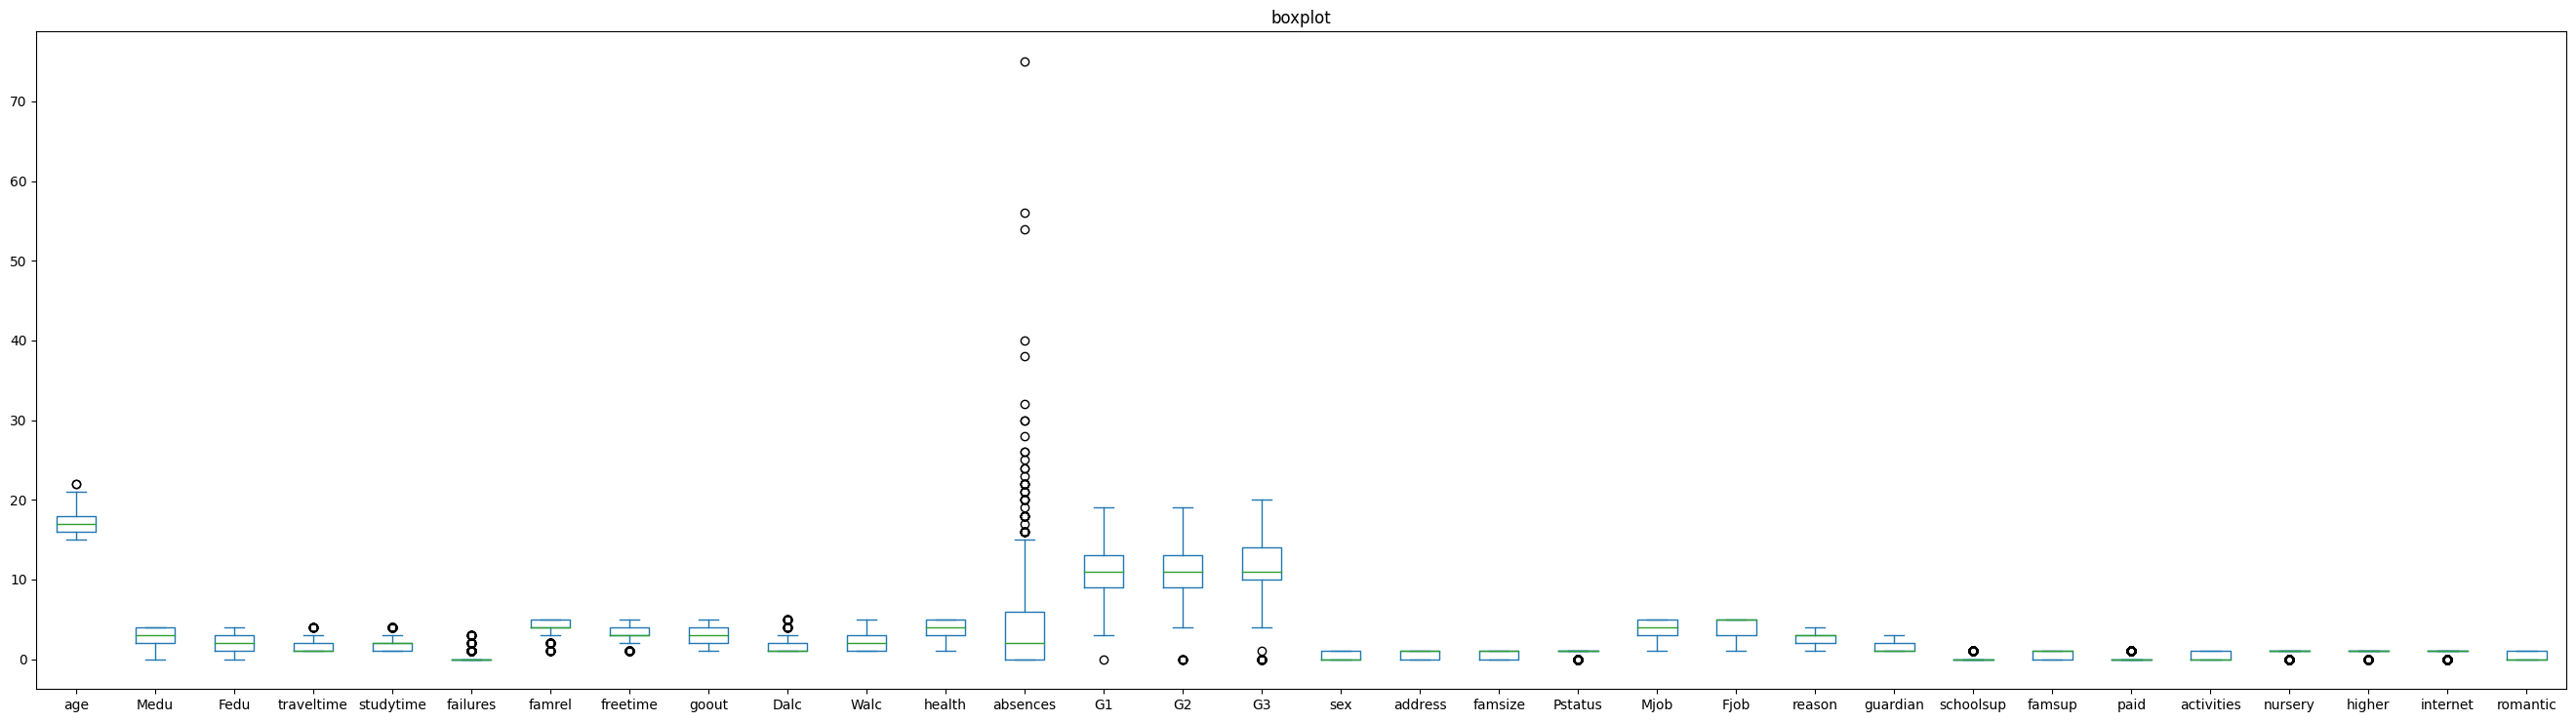

In [34]:
# Set the figure size
plt.rcParams["figure.figsize"] = [26.50, 7.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = combine.plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [35]:
x = combine.loc[:, ~combine.columns.isin(['G3','school','activities','absences','failures'])]

In [36]:
y = combine.loc[:, combine.columns.isin(['G3'])]

In [37]:
y.shape

(1044, 1)

In [38]:
x.shape

(1044, 28)

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'Medu'}>,
        <AxesSubplot: title={'center': 'Fedu'}>,
        <AxesSubplot: title={'center': 'traveltime'}>,
        <AxesSubplot: title={'center': 'studytime'}>],
       [<AxesSubplot: title={'center': 'famrel'}>,
        <AxesSubplot: title={'center': 'freetime'}>,
        <AxesSubplot: title={'center': 'goout'}>,
        <AxesSubplot: title={'center': 'Dalc'}>,
        <AxesSubplot: title={'center': 'Walc'}>],
       [<AxesSubplot: title={'center': 'health'}>,
        <AxesSubplot: title={'center': 'G1'}>,
        <AxesSubplot: title={'center': 'G2'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'address'}>],
       [<AxesSubplot: title={'center': 'famsize'}>,
        <AxesSubplot: title={'center': 'Pstatus'}>,
        <AxesSubplot: title={'center': 'Mjob'}>,
        <AxesSubplot: title={'center': 'Fjob'}>,
        <AxesSubplot: title={'center': 'rea

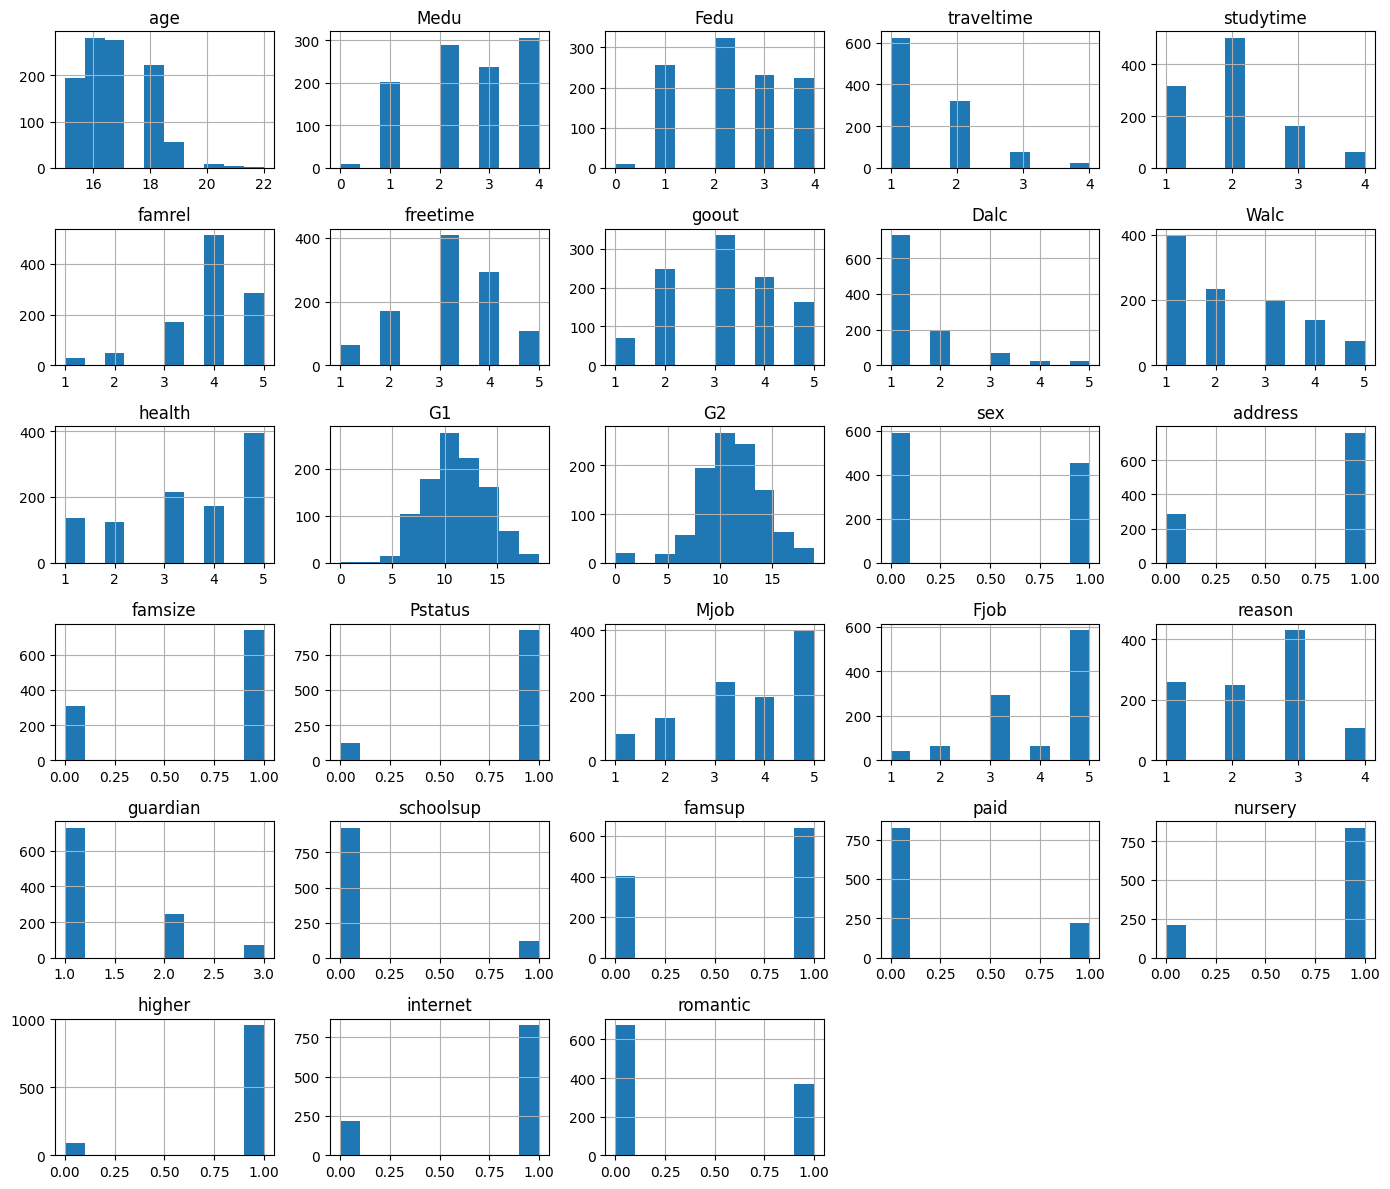

In [39]:
x.hist(figsize=(14,12))

In [40]:
combine.corr()

/tmp/ipykernel_2796/1748709409.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combine.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,...,0.014622,0.210603,-0.202824,-0.116904,-0.027917,-0.073648,-0.046846,-0.244601,-0.033229,0.173800
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,...,-0.084714,-0.116713,-0.023618,0.143063,0.161349,0.116924,0.149287,0.206551,0.249728,-0.008685
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,...,-0.051833,0.004411,0.032450,0.153342,0.118897,0.093800,0.104681,0.191956,0.170012,-0.039906
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,...,0.140993,0.076186,-0.033940,-0.026117,-0.083679,-0.025834,-0.018641,-0.081857,-0.169485,0.013603
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,...,-0.095611,0.023584,0.070598,0.143858,0.105704,0.078847,0.056817,0.186556,0.049695,0.038435
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,...,0.055028,0.177203,0.002483,-0.027574,-0.036389,-0.027500,-0.083027,-0.284893,-0.074263,0.076042
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,...,0.007328,-0.011817,-0.007634,0.002261,0.015404,0.051574,0.024599,0.041502,0.065972,-0.051891
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,...,0.065301,0.017863,-0.026126,0.006227,-0.034747,0.128601,-0.013837,-0.086824,0.061016,0.012372
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,...,0.018423,-0.040447,-0.051227,0.005252,-0.012943,0.072236,0.013779,-0.062837,0.083766,0.003606
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,...,0.047001,0.092405,-0.025852,-0.022275,0.041919,-0.010584,-0.080647,-0.112964,0.039511,0.045311


<AxesSubplot: ylabel='Frequency'>

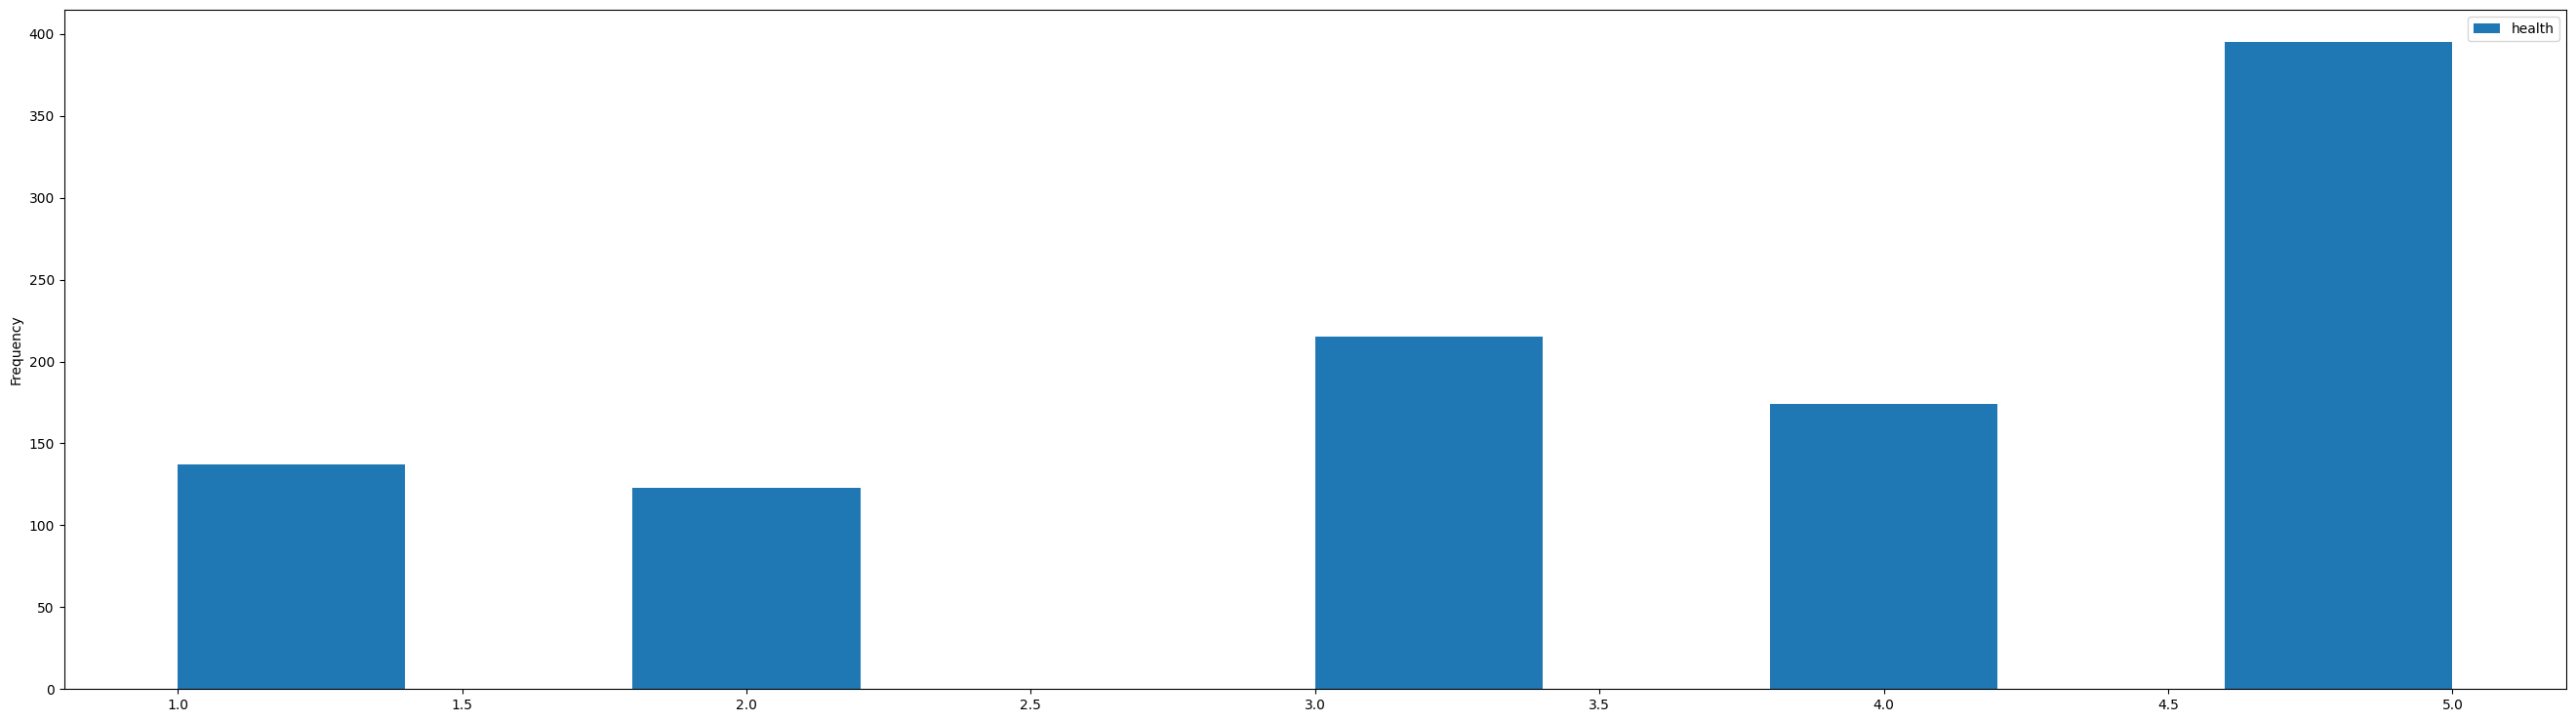

In [41]:
x[['health']].plot(kind='hist')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [43]:
X_train.shape

(783, 28)

In [44]:
y_train.shape

(783, 1)

In [45]:
# LR
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
r2 = model.score(X_train,y_train)

In [48]:
print(r2)

0.8457113107463378


In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [51]:
mean_absolute_error(y_test, y_pred)

0.9898533283348354

In [52]:
y_train.shape

(783, 1)

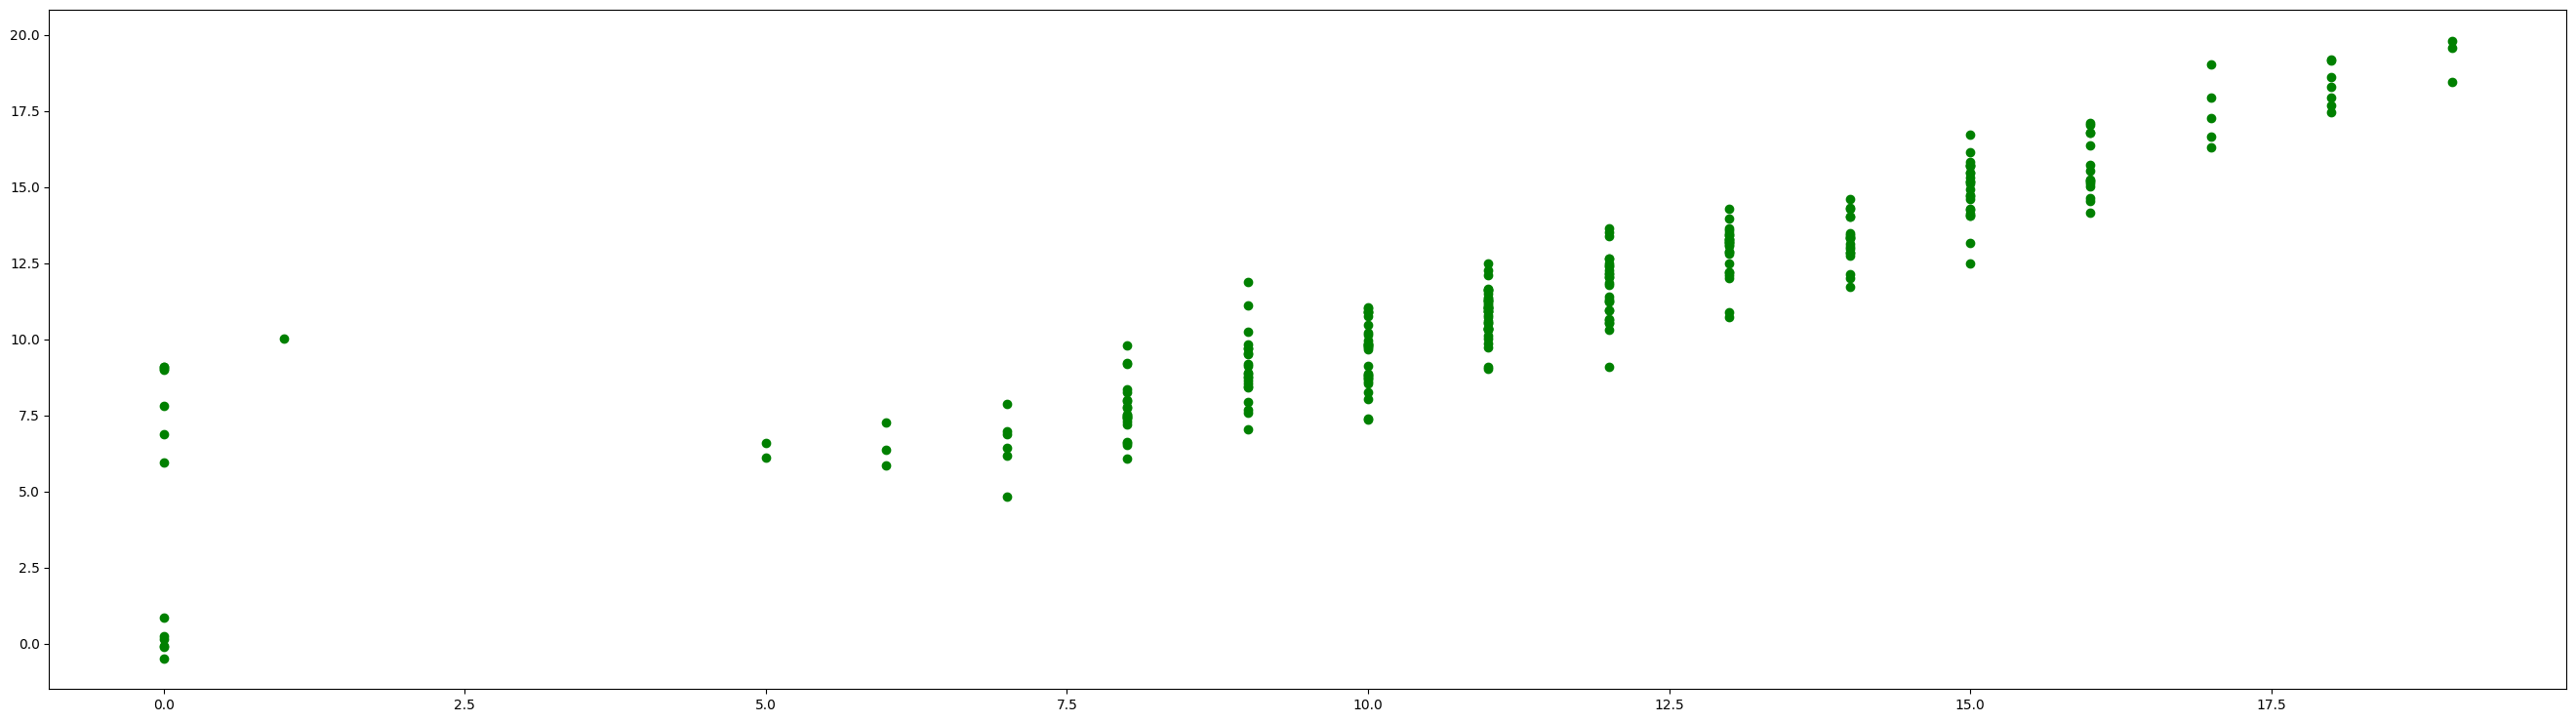

In [53]:
plt.scatter(y_test, y_pred,color='g') 

plt.show()

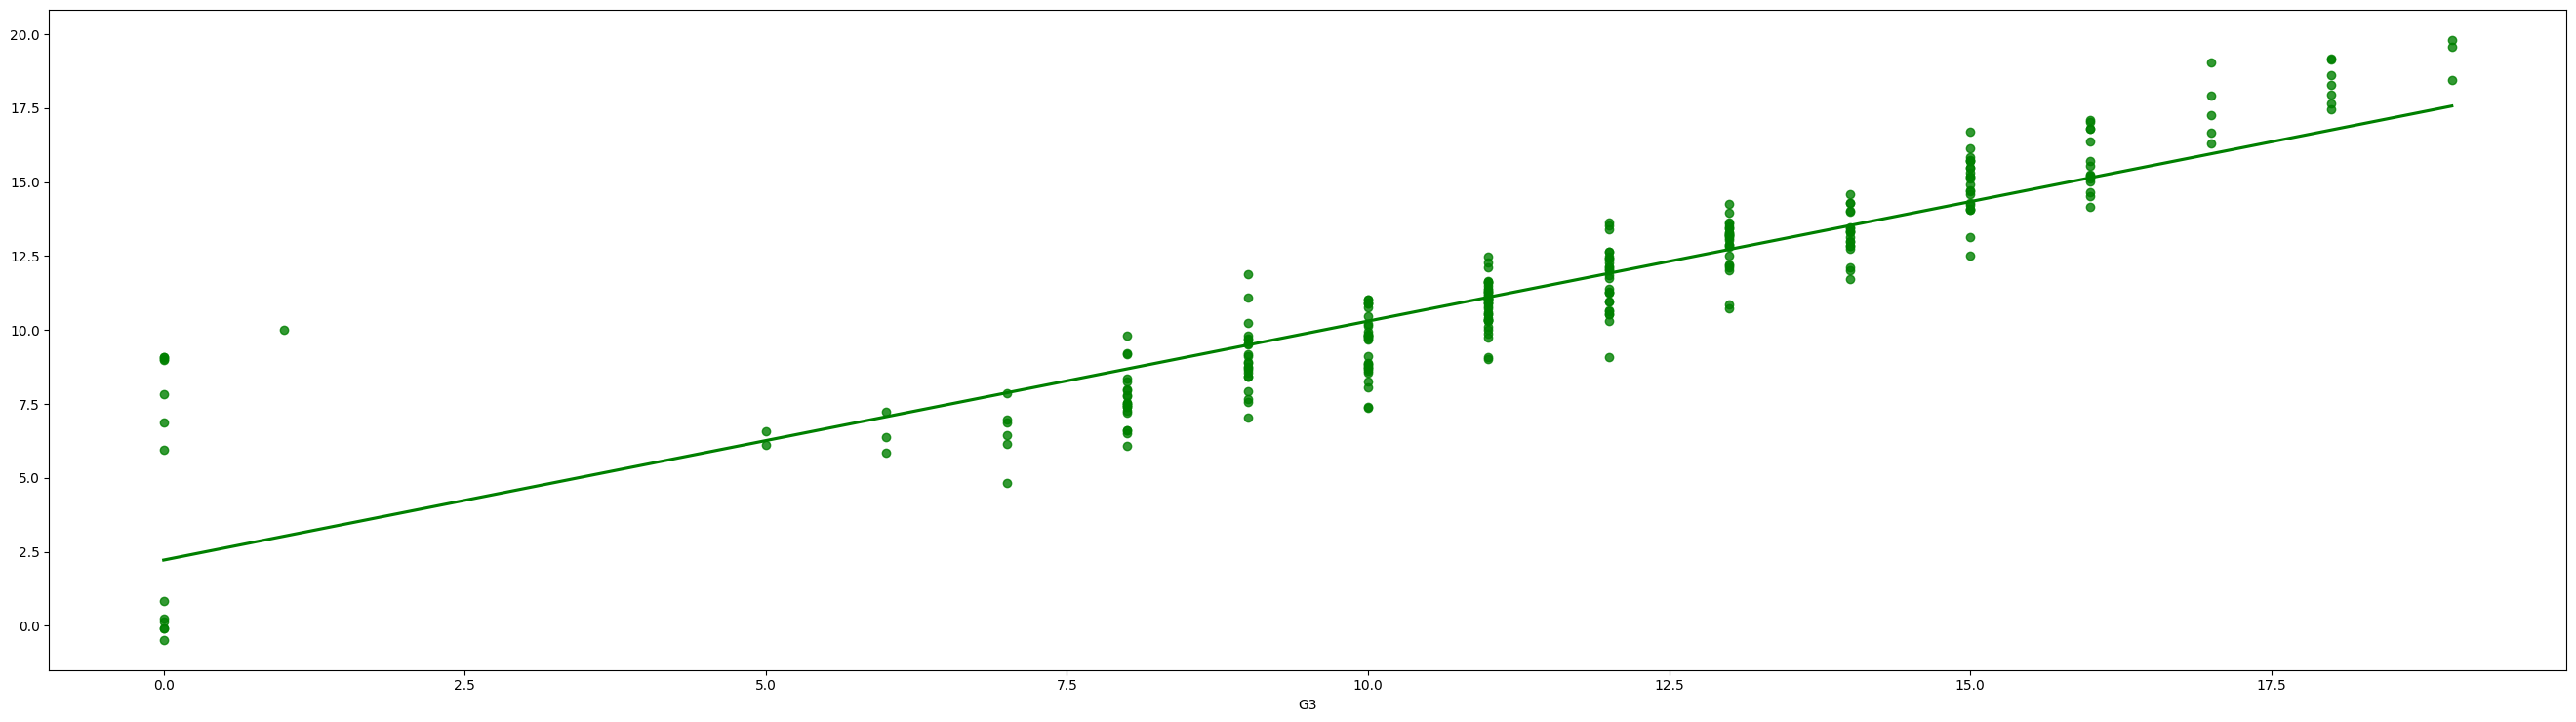

In [54]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

In [55]:
# svm
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
lnsvr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))

In [57]:
lnsvr.fit(X_train,y_train)

/home/joshard/jupyter_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=0, tol=1e-05))])

In [58]:
lnsvr.score(X_test,y_test)

0.8087690853913996

In [59]:
y_pred_lnsvr = lnsvr.predict(X_test)

In [60]:
mean_absolute_error(y_test, y_pred_lnsvr)

0.8352521698683614

In [61]:
from sklearn.linear_model import SGDRegressor

In [62]:
sdgreg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [63]:
sdgreg.fit(X_train,y_train)

/home/joshard/jupyter_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [64]:
sdgreg.score(X_test,y_test)

0.8002993769744549

In [65]:
y_pred_sdgreg = sdgreg.predict(X_test)

In [66]:
mean_absolute_error(y_test, y_pred_sdgreg)

0.9944472759829186

In [67]:
svmt = svm.SVR(kernel='rbf').fit(X_train,y_train)

/home/joshard/jupyter_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
svmt.score(X_test,y_test)

0.7904864607324271

In [69]:
y_svmt = svmt.predict(X_test)

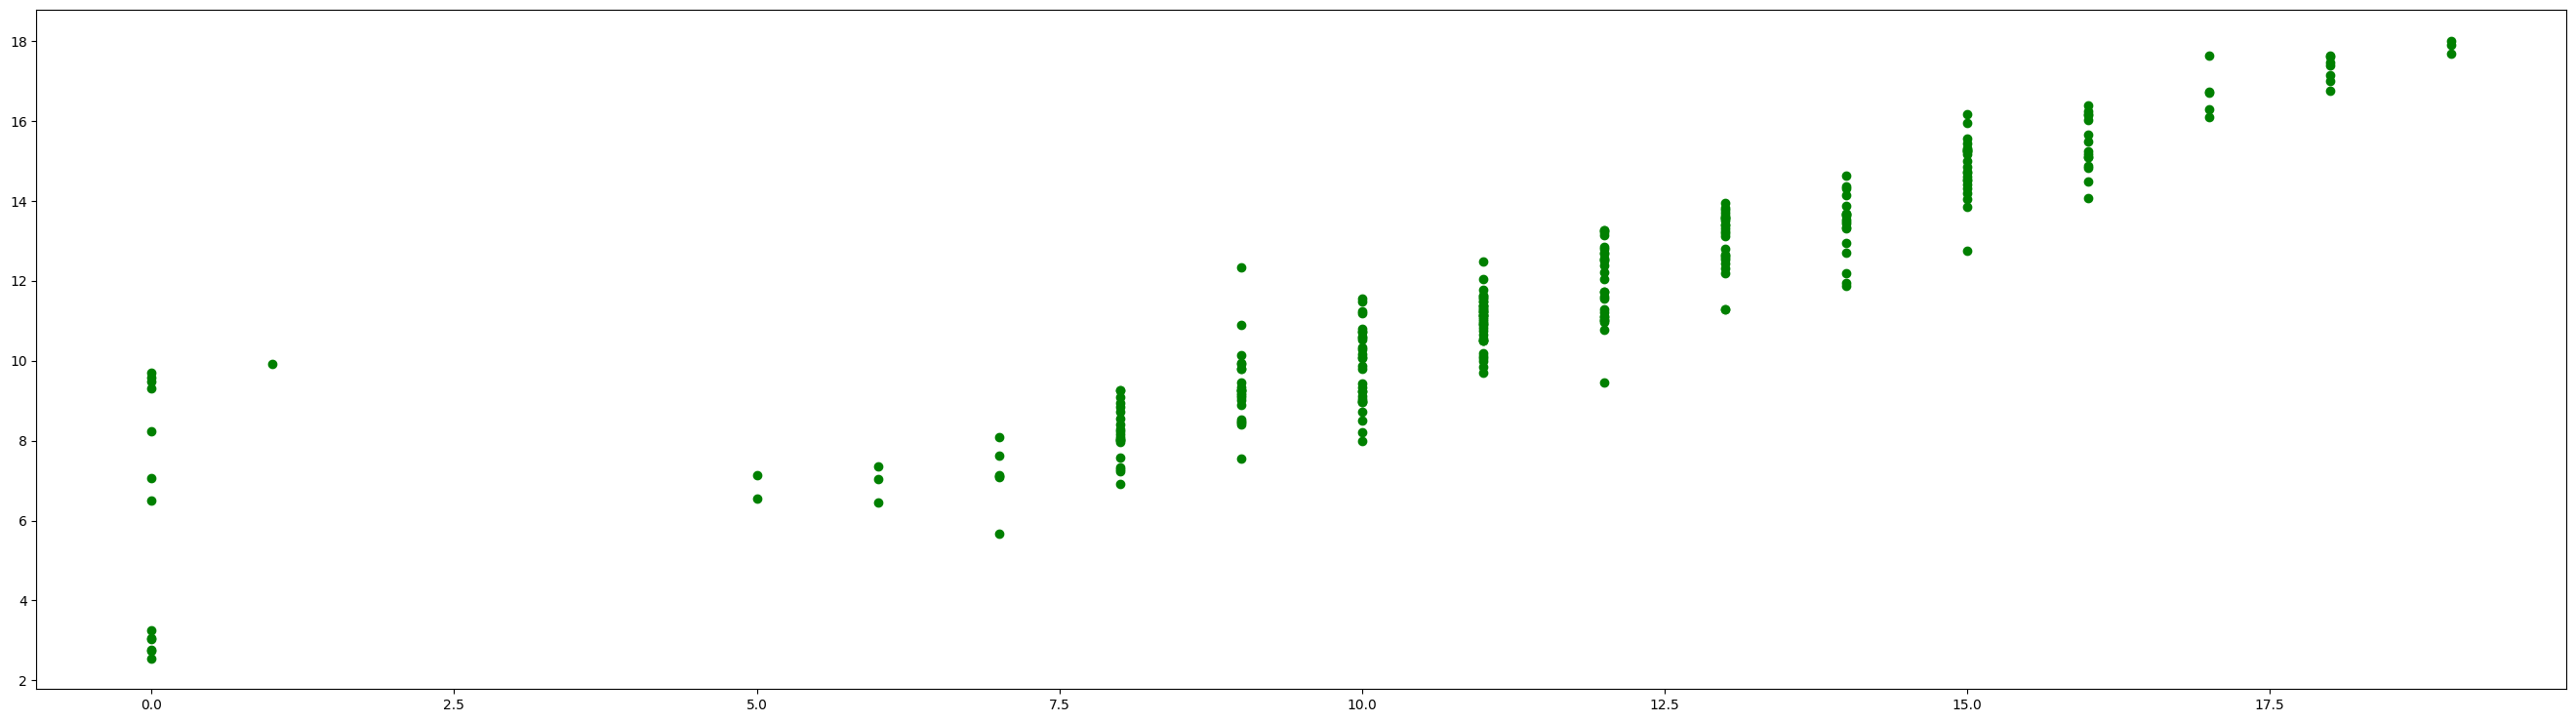

In [70]:
plt.scatter(y_test,y_svmt,color='g') 

plt.show()

<AxesSubplot: xlabel='G3'>

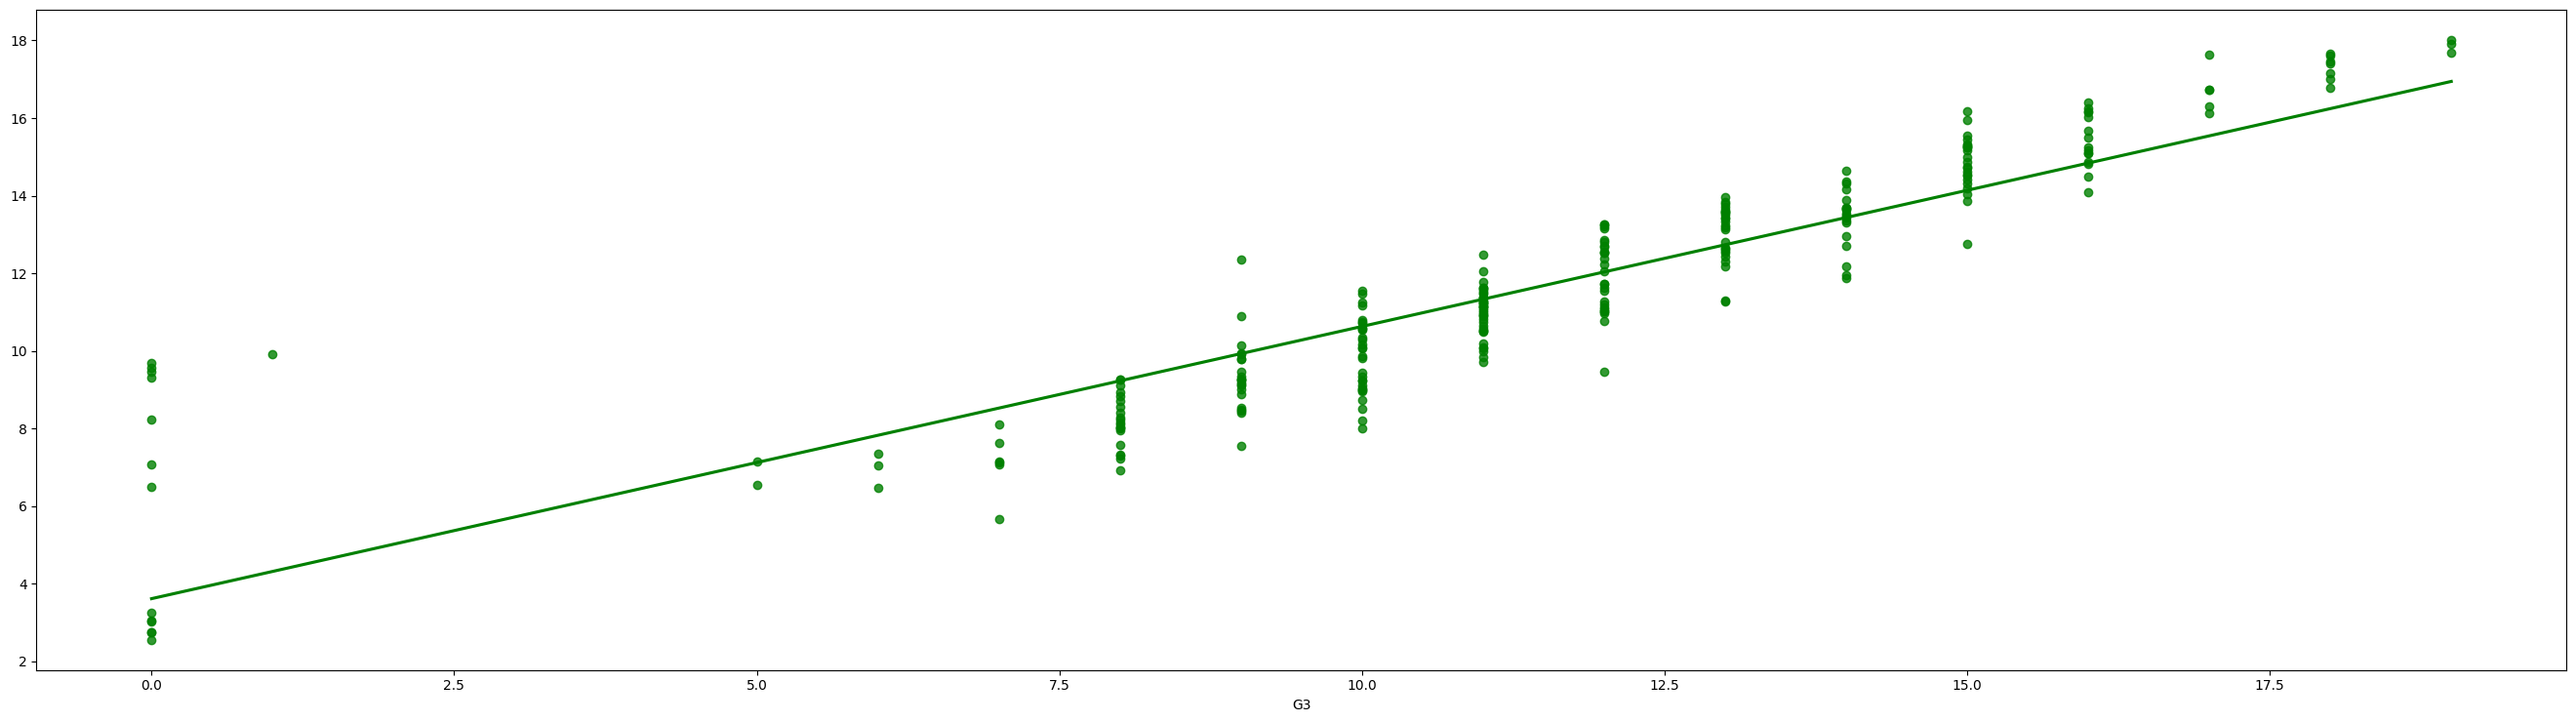

In [71]:
sns.regplot(x=y_test,y=y_svmt,ci=None,color ='green')

In [72]:
from sklearn.linear_model import LogisticRegression
models = [('lr',LogisticRegression()),('svm',svm.SVC())]

In [73]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=models)

In [74]:
ensemble.fit(X_train,y_train)

/home/joshard/jupyter_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joshard/jupyter_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/joshard/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svm', SVC())])

In [75]:
ensemble.score(X_test,y_test)

0.3371647509578544

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [77]:
regr = RandomForestRegressor(max_depth=2, random_state=0,max_features='auto')

In [78]:
regr.fit(X_train,y_train)

/tmp/ipykernel_2796/3259036601.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,y_train)
/home/joshard/jupyter_env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=2, max_features='auto', random_state=0)

In [79]:
regr.score(X_test,y_test)

0.7415026301528065

In [80]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5,weights='distance')

In [81]:
neigh.fit(X_train,y_train)

KNeighborsRegressor(weights='distance')

In [82]:
neigh.score(X_test,y_test)

0.77052470620481

In [85]:
import lime
import lime.lime_tabular

In [107]:
############## create explainer ###########
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['G3'], verbose=True, mode='regression')

In [114]:
############## visualizations #############
j = 5
exp = explainer.explain_instance(X_test.values[j], model.predict, num_features=6)

/home/joshard/jupyter_env/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Intercept 10.708081225201573
Prediction_local [12.33464538]
Right: 12.271979580370724


In [115]:
exp.show_in_notebook(show_table=True)

In [ ]:
# the predicted value of grade 3 is 12.7
# 
# 